In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#LEO EL DATASET
df = pd.read_csv("../data/raw/gladiator_data.csv")
df.head()

,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,Aelius Verus,32,97,Gaul,195,85,Thraex,11,4,Novice,...,15,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False
1,Cocceius Galerius,20,32,Gaul,173,66,Hoplomachus,7,2,Speed,...,9,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True
2,Pedius Furius,30,66,Gaul,170,67,Hoplomachus,6,0,Tactics,...,6,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True
3,Maximian Maecenas,28,43,Gaul,189,104,Hoplomachus,6,2,Endurance,...,8,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False
4,Celsus Laronius,41,126,Rome,173,85,Hoplomachus,12,4,Novice,...,16,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     9976 non-null   object 
 1   Age                      9976 non-null   int64  
 2   Birth Year               9976 non-null   int64  
 3   Origin                   9976 non-null   object 
 4   Height                   9976 non-null   int64  
 5   Weight                   9976 non-null   int64  
 6   Category                 9976 non-null   object 
 7   Wins                     9976 non-null   int64  
 8   Losses                   9976 non-null   int64  
 9   Special Skills           9976 non-null   object 
 10  Weapon of Choice         9976 non-null   object 
 11  Patron Wealth            9976 non-null   object 
 12  Equipment Quality        9976 non-null   object 
 13  Public Favor             9976 non-null   float64
 14  Injury History          

In [5]:
df['Name'].value_counts(normalize=True)

Name
Clodius Urbanus         0.0001
Aelius Verus            0.0001
Cocceius Galerius       0.0001
Pedius Furius           0.0001
Maximian Maecenas       0.0001
                         ...  
Marcellus Pompeius      0.0001
Iuventius Ingenuus      0.0001
Sergius Mamilius        0.0001
Vespasian Candidus      0.0001
Quintilianus Avidius    0.0001
Name: proportion, Length: 9976, dtype: float64

In [6]:
df['Name'].nunique()

9976

In [7]:
df = df.drop('Name', axis=1)
df.head()

,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,Weapon of Choice,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,32,97,Gaul,195,85,Thraex,11,4,Novice,Sica (Curved Sword),...,15,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False
1,20,32,Gaul,173,66,Hoplomachus,7,2,Speed,Dagger,...,9,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True
2,30,66,Gaul,170,67,Hoplomachus,6,0,Tactics,Dagger,...,6,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True
3,28,43,Gaul,189,104,Hoplomachus,6,2,Endurance,Dagger,...,8,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False
4,41,126,Rome,173,85,Hoplomachus,12,4,Novice,Dagger,...,16,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False


In [8]:
df['WinLossRatio'] = df['Wins'] / (df['Wins'] + df['Losses'])
df['WinLossRatio'] = df['WinLossRatio'].fillna(0.5)
df.head()

,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,Weapon of Choice,...,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,WinLossRatio
0,32,97,Gaul,195,85,Thraex,11,4,Novice,Sica (Curved Sword),...,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0.733333
1,20,32,Gaul,173,66,Hoplomachus,7,2,Speed,Dagger,...,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True,0.777778
2,30,66,Gaul,170,67,Hoplomachus,6,0,Tactics,Dagger,...,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,1.000000
3,28,43,Gaul,189,104,Hoplomachus,6,2,Endurance,Dagger,...,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False,0.750000
4,41,126,Rome,173,85,Hoplomachus,12,4,Novice,Dagger,...,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,0.750000


In [9]:
columnas_para_heatmap = [
    'WinLossRatio',
    'Survived']

df_seleccionado = df[columnas_para_heatmap]

matriz_correlacion = df_seleccionado.corr()

<Axes: >

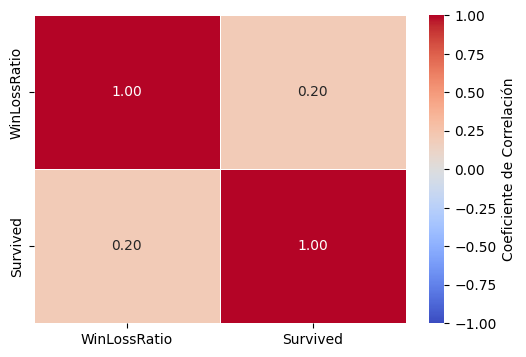

In [10]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [11]:
df = df.drop('WinLossRatio', axis=1)
df.head()

,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,Weapon of Choice,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,32,97,Gaul,195,85,Thraex,11,4,Novice,Sica (Curved Sword),...,15,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False
1,20,32,Gaul,173,66,Hoplomachus,7,2,Speed,Dagger,...,9,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True
2,30,66,Gaul,170,67,Hoplomachus,6,0,Tactics,Dagger,...,6,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True
3,28,43,Gaul,189,104,Hoplomachus,6,2,Endurance,Dagger,...,8,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False
4,41,126,Rome,173,85,Hoplomachus,12,4,Novice,Dagger,...,16,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False


In [12]:
df['Origin'].nunique()

6

In [13]:
df['Origin'].unique()

array(['Gaul', 'Rome', 'Thrace', 'Numidia', 'Greece', 'Germania'],
      dtype=object)

In [14]:
df_encoded = pd.get_dummies(df, columns=['Origin'], drop_first=False, dtype=int)
df_encoded.head()

,Age,Birth Year,Height,Weight,Category,Wins,Losses,Special Skills,Weapon of Choice,Patron Wealth,...,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Origin_Gaul,Origin_Germania,Origin_Greece,Origin_Numidia,Origin_Rome,Origin_Thrace
0,32,97,195,85,Thraex,11,4,Novice,Sica (Curved Sword),Low,...,Balanced,Medium,Flamboyant,False,1,0,0,0,0,0
1,20,32,173,66,Hoplomachus,7,2,Speed,Dagger,Low,...,Balanced,Low,Humble,True,1,0,0,0,0,0
2,30,66,170,67,Hoplomachus,6,0,Tactics,Dagger,High,...,Aggressive,Medium,Intimidating,True,1,0,0,0,0,0
3,28,43,189,104,Hoplomachus,6,2,Endurance,Dagger,High,...,Balanced,Low,Charismatic,False,1,0,0,0,0,0
4,41,126,173,85,Hoplomachus,12,4,Novice,Dagger,Medium,...,Aggressive,High,Intimidating,False,0,0,0,0,1,0


In [15]:
columnas_para_heatmap1 = [
    'Origin_Gaul',
    'Origin_Germania',
    'Origin_Greece',
    'Origin_Numidia',
    'Origin_Rome',
    'Origin_Thrace',
    'Survived']

df1_seleccionado = df_encoded[columnas_para_heatmap1]

matriz_correlacion1 = df1_seleccionado.corr()

<Axes: >

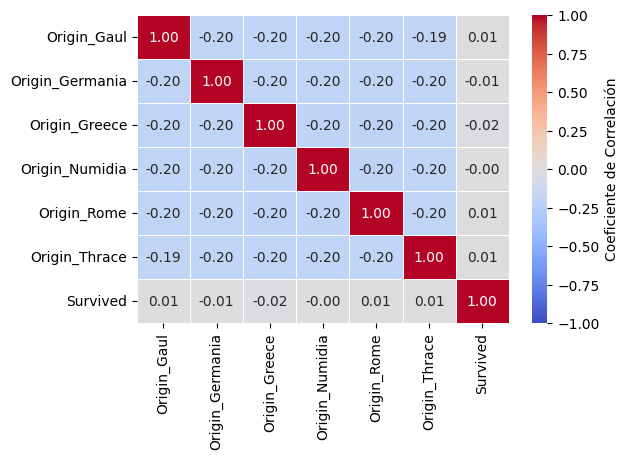

In [16]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion1,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [17]:
columnas_a_eliminar = ['Origin_Gaul', 'Origin_Germania', 'Origin_Greece', 'Origin_Numidia', 'Origin_Rome', 'Origin_Thrace']

In [18]:
df1 = df_encoded.drop(columnas_a_eliminar, axis=1)
df1.head()

,Age,Birth Year,Height,Weight,Category,Wins,Losses,Special Skills,Weapon of Choice,Patron Wealth,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,32,97,195,85,Thraex,11,4,Novice,Sica (Curved Sword),Low,...,15,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False
1,20,32,173,66,Hoplomachus,7,2,Speed,Dagger,Low,...,9,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True
2,30,66,170,67,Hoplomachus,6,0,Tactics,Dagger,High,...,6,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True
3,28,43,189,104,Hoplomachus,6,2,Endurance,Dagger,High,...,8,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False
4,41,126,173,85,Hoplomachus,12,4,Novice,Dagger,Medium,...,16,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False


In [19]:
df1['Height_m'] = df1['Height'] / 100 #Convertir cm a metros
df1['BMI'] = df1['Weight'] / (df1['Height_m'] ** 2)
df1.head()

,Age,Birth Year,Height,Weight,Category,Wins,Losses,Special Skills,Weapon of Choice,Patron Wealth,...,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Height_m,BMI
0,32,97,195,85,Thraex,11,4,Novice,Sica (Curved Sword),Low,...,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,1.95,22.353715
1,20,32,173,66,Hoplomachus,7,2,Speed,Dagger,Low,...,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True,1.73,22.052190
2,30,66,170,67,Hoplomachus,6,0,Tactics,Dagger,High,...,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,1.70,23.183391
3,28,43,189,104,Hoplomachus,6,2,Endurance,Dagger,High,...,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False,1.89,29.114526
4,41,126,173,85,Hoplomachus,12,4,Novice,Dagger,Medium,...,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,1.73,28.400548


In [20]:
columnas_para_heatmap2 = [
    'BMI',
    'Height_m',
    'Survived']

df2_seleccionado = df1[columnas_para_heatmap2]

matriz_correlacion2 = df2_seleccionado.corr()

<Axes: >

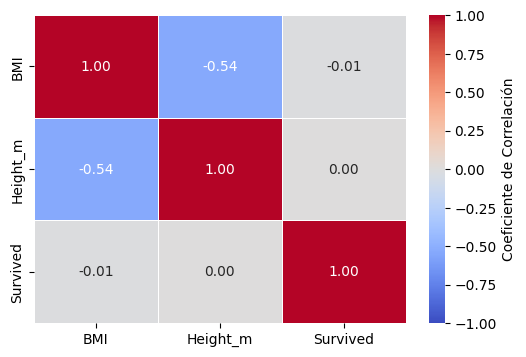

In [21]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion2,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [22]:
df1 = df1.drop('BMI', axis=1)
df1.head()

,Age,Birth Year,Height,Weight,Category,Wins,Losses,Special Skills,Weapon of Choice,Patron Wealth,...,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Height_m
0,32,97,195,85,Thraex,11,4,Novice,Sica (Curved Sword),Low,...,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,1.95
1,20,32,173,66,Hoplomachus,7,2,Speed,Dagger,Low,...,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True,1.73
2,30,66,170,67,Hoplomachus,6,0,Tactics,Dagger,High,...,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,1.70
3,28,43,189,104,Hoplomachus,6,2,Endurance,Dagger,High,...,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False,1.89
4,41,126,173,85,Hoplomachus,12,4,Novice,Dagger,Medium,...,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,1.73


In [23]:
df1 = df1.drop('Height_m', axis=1)
df1.head()

,Age,Birth Year,Height,Weight,Category,Wins,Losses,Special Skills,Weapon of Choice,Patron Wealth,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,32,97,195,85,Thraex,11,4,Novice,Sica (Curved Sword),Low,...,15,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False
1,20,32,173,66,Hoplomachus,7,2,Speed,Dagger,Low,...,9,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True
2,30,66,170,67,Hoplomachus,6,0,Tactics,Dagger,High,...,6,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True
3,28,43,189,104,Hoplomachus,6,2,Endurance,Dagger,High,...,8,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False
4,41,126,173,85,Hoplomachus,12,4,Novice,Dagger,Medium,...,16,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False


In [24]:
# Age * Battle Experience
df1['Age_x_BattleExperience'] = df1['Age'] * df1['Battle Experience']
df1.head()

,Age,Birth Year,Height,Weight,Category,Wins,Losses,Special Skills,Weapon of Choice,Patron Wealth,...,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Age_x_BattleExperience
0,32,97,195,85,Thraex,11,4,Novice,Sica (Curved Sword),Low,...,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,480
1,20,32,173,66,Hoplomachus,7,2,Speed,Dagger,Low,...,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True,180
2,30,66,170,67,Hoplomachus,6,0,Tactics,Dagger,High,...,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,180
3,28,43,189,104,Hoplomachus,6,2,Endurance,Dagger,High,...,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False,224
4,41,126,173,85,Hoplomachus,12,4,Novice,Dagger,Medium,...,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,656


In [25]:
columnas_para_heatmap3 = [
    'Age_x_BattleExperience',
    'Survived']

df3_seleccionado = df1[columnas_para_heatmap3]

matriz_correlacion3 = df3_seleccionado.corr()

<Axes: >

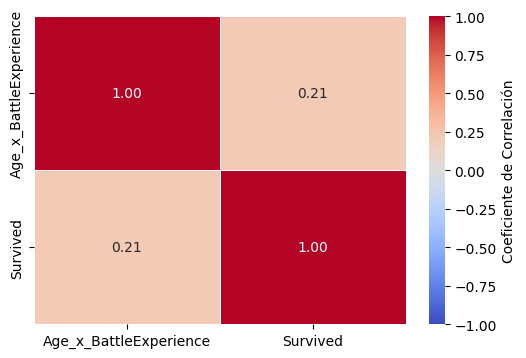

In [26]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion3,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [27]:
df1 = df1.drop('Age_x_BattleExperience', axis=1)
df1.head()

,Age,Birth Year,Height,Weight,Category,Wins,Losses,Special Skills,Weapon of Choice,Patron Wealth,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,32,97,195,85,Thraex,11,4,Novice,Sica (Curved Sword),Low,...,15,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False
1,20,32,173,66,Hoplomachus,7,2,Speed,Dagger,Low,...,9,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True
2,30,66,170,67,Hoplomachus,6,0,Tactics,Dagger,High,...,6,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True
3,28,43,189,104,Hoplomachus,6,2,Endurance,Dagger,High,...,8,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False
4,41,126,173,85,Hoplomachus,12,4,Novice,Dagger,Medium,...,16,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      9976 non-null   int64  
 1   Birth Year               9976 non-null   int64  
 2   Height                   9976 non-null   int64  
 3   Weight                   9976 non-null   int64  
 4   Category                 9976 non-null   object 
 5   Wins                     9976 non-null   int64  
 6   Losses                   9976 non-null   int64  
 7   Special Skills           9976 non-null   object 
 8   Weapon of Choice         9976 non-null   object 
 9   Patron Wealth            9976 non-null   object 
 10  Equipment Quality        9976 non-null   object 
 11  Public Favor             9976 non-null   float64
 12  Injury History           9976 non-null   object 
 13  Mental Resilience        9976 non-null   float64
 14  Diet and Nutrition      

In [29]:
df1['Category'].nunique()

6

In [30]:
df1['Category'].unique()

array(['Thraex', 'Hoplomachus', 'Retiarius', 'Murmillo', 'Provocator',
       'Secutor'], dtype=object)

In [31]:
df1_encoded = pd.get_dummies(df1, columns=['Category'], drop_first=False, dtype=int)
df1_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Special Skills,Weapon of Choice,Patron Wealth,Equipment Quality,...,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Category_Hoplomachus,Category_Murmillo,Category_Provocator,Category_Retiarius,Category_Secutor,Category_Thraex
0,32,97,195,85,11,4,Novice,Sica (Curved Sword),Low,Basic,...,Balanced,Medium,Flamboyant,False,0,0,0,0,0,1
1,20,32,173,66,7,2,Speed,Dagger,Low,Basic,...,Balanced,Low,Humble,True,1,0,0,0,0,0
2,30,66,170,67,6,0,Tactics,Dagger,High,Superior,...,Aggressive,Medium,Intimidating,True,1,0,0,0,0,0
3,28,43,189,104,6,2,Endurance,Dagger,High,Superior,...,Balanced,Low,Charismatic,False,1,0,0,0,0,0
4,41,126,173,85,12,4,Novice,Dagger,Medium,Standard,...,Aggressive,High,Intimidating,False,1,0,0,0,0,0


In [32]:
columnas_para_heatmap4 = [
    'Category_Hoplomachus',
    'Category_Murmillo',
    'Category_Provocator',
    'Category_Retiarius',
    'Category_Secutor',
    'Category_Thraex',
    'Survived']

df4_seleccionado = df1_encoded[columnas_para_heatmap4]

matriz_correlacion4 = df4_seleccionado.corr()

<Axes: >

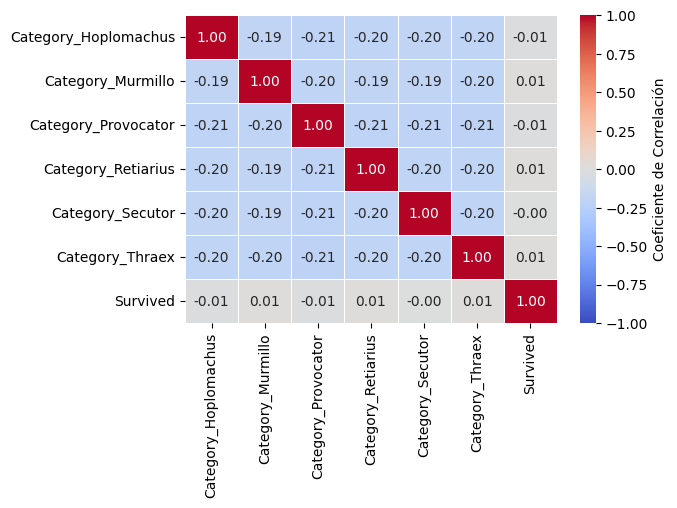

In [33]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion4,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [34]:
columnas_a_eliminar1 = ['Category_Hoplomachus', 'Category_Murmillo', 'Category_Provocator', 'Category_Retiarius', 'Category_Secutor', 'Category_Thraex']

In [35]:
df2 = df1_encoded.drop(columnas_a_eliminar1, axis=1)
df2.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Special Skills,Weapon of Choice,Patron Wealth,Equipment Quality,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,32,97,195,85,11,4,Novice,Sica (Curved Sword),Low,Basic,...,15,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False
1,20,32,173,66,7,2,Speed,Dagger,Low,Basic,...,9,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True
2,30,66,170,67,6,0,Tactics,Dagger,High,Superior,...,6,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True
3,28,43,189,104,6,2,Endurance,Dagger,High,Superior,...,8,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False
4,41,126,173,85,12,4,Novice,Dagger,Medium,Standard,...,16,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False


In [36]:
df2['Special Skills'].nunique()

6

In [37]:
df2['Special Skills'].unique()

array(['Novice', 'Speed', 'Tactics', 'Endurance', 'Strength', 'Agility'],
      dtype=object)

In [38]:
df2['Special Skills'] = df2['Special Skills'].str.replace('...', '', regex=False)
df2.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Special Skills,Weapon of Choice,Patron Wealth,Equipment Quality,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,32,97,195,85,11,4,Novice,Sica (Curved Sword),Low,Basic,...,15,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False
1,20,32,173,66,7,2,Speed,Dagger,Low,Basic,...,9,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True
2,30,66,170,67,6,0,Tactics,Dagger,High,Superior,...,6,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True
3,28,43,189,104,6,2,Endurance,Dagger,High,Superior,...,8,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False
4,41,126,173,85,12,4,Novice,Dagger,Medium,Standard,...,16,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False


In [39]:
df2_encoded = pd.get_dummies(df2, columns=['Special Skills'], drop_first=False, dtype=int)
df2_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Weapon of Choice,Patron Wealth,Equipment Quality,Public Favor,...,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Special Skills_Agility,Special Skills_Endurance,Special Skills_Novice,Special Skills_Speed,Special Skills_Strength,Special Skills_Tactics
0,32,97,195,85,11,4,Sica (Curved Sword),Low,Basic,0.841842,...,Balanced,Medium,Flamboyant,False,0,0,1,0,0,0
1,20,32,173,66,7,2,Dagger,Low,Basic,0.651044,...,Balanced,Low,Humble,True,0,0,0,1,0,0
2,30,66,170,67,6,0,Dagger,High,Superior,0.593816,...,Aggressive,Medium,Intimidating,True,0,0,0,0,0,1
3,28,43,189,104,6,2,Dagger,High,Superior,0.540815,...,Balanced,Low,Charismatic,False,0,1,0,0,0,0
4,41,126,173,85,12,4,Dagger,Medium,Standard,0.761651,...,Aggressive,High,Intimidating,False,0,0,1,0,0,0


In [40]:
columnas_para_heatmap4 = [
    'Special Skills_Agility',
    'Special Skills_Endurance',
    'Special Skills_Novice',
    'Special Skills_Speed',
    'Special Skills_Strength',
    'Special Skills_Tactics',
    'Survived']

df4_seleccionado = df2_encoded[columnas_para_heatmap4]

matriz_correlacion4 = df4_seleccionado.corr()

<Axes: >

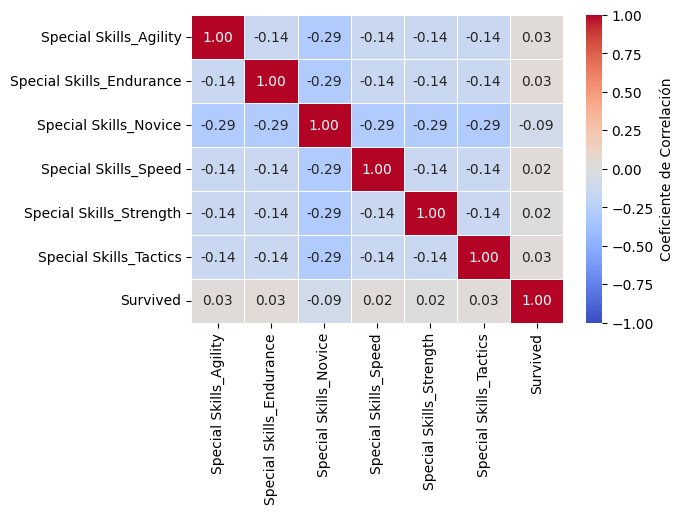

In [41]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion4,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [42]:
columnas_a_eliminar2 = ['Special Skills_Agility', 'Special Skills_Endurance', 'Special Skills_Novice', 'Special Skills_Speed', 'Special Skills_Strength', 'Special Skills_Tactics']

In [43]:
df3 = df2_encoded.drop(columnas_a_eliminar2, axis=1)
df3.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Weapon of Choice,Patron Wealth,Equipment Quality,Public Favor,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,32,97,195,85,11,4,Sica (Curved Sword),Low,Basic,0.841842,...,15,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False
1,20,32,173,66,7,2,Dagger,Low,Basic,0.651044,...,9,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True
2,30,66,170,67,6,0,Dagger,High,Superior,0.593816,...,6,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True
3,28,43,189,104,6,2,Dagger,High,Superior,0.540815,...,8,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False
4,41,126,173,85,12,4,Dagger,Medium,Standard,0.761651,...,16,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False


In [44]:
df3['Weapon of Choice'].nunique()

6

In [45]:
df3['Weapon of Choice'].unique()

array(['Sica (Curved Sword)', 'Dagger', 'Net', 'Spear', 'Gladius (Sword)',
       'Trident'], dtype=object)

In [46]:
df3['Weapon of Choice'].value_counts()

Weapon of Choice
Dagger                 4186
Gladius (Sword)        2507
Sica (Curved Sword)     843
Trident                 820
Net                     818
Spear                   802
Name: count, dtype: int64

In [47]:
df3_encoded = pd.get_dummies(df3, columns=['Weapon of Choice'], drop_first=False, dtype=int)
df3_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Patron Wealth,Equipment Quality,Public Favor,Injury History,...,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Weapon of Choice_Dagger,Weapon of Choice_Gladius (Sword),Weapon of Choice_Net,Weapon of Choice_Sica (Curved Sword),Weapon of Choice_Spear,Weapon of Choice_Trident
0,32,97,195,85,11,4,Low,Basic,0.841842,High,...,Balanced,Medium,Flamboyant,False,0,0,0,1,0,0
1,20,32,173,66,7,2,Low,Basic,0.651044,Low,...,Balanced,Low,Humble,True,1,0,0,0,0,0
2,30,66,170,67,6,0,High,Superior,0.593816,Low,...,Aggressive,Medium,Intimidating,True,1,0,0,0,0,0
3,28,43,189,104,6,2,High,Superior,0.540815,Low,...,Balanced,Low,Charismatic,False,1,0,0,0,0,0
4,41,126,173,85,12,4,Medium,Standard,0.761651,High,...,Aggressive,High,Intimidating,False,1,0,0,0,0,0


In [48]:
columnas_para_heatmap5 = [
    'Weapon of Choice_Dagger',
    'Weapon of Choice_Gladius (Sword)',
    'Weapon of Choice_Net',
    'Weapon of Choice_Sica (Curved Sword)',
    'Weapon of Choice_Spear',
    'Weapon of Choice_Trident',
    'Survived']

df5_seleccionado = df3_encoded[columnas_para_heatmap5]

matriz_correlacion5 = df5_seleccionado.corr()

<Axes: >

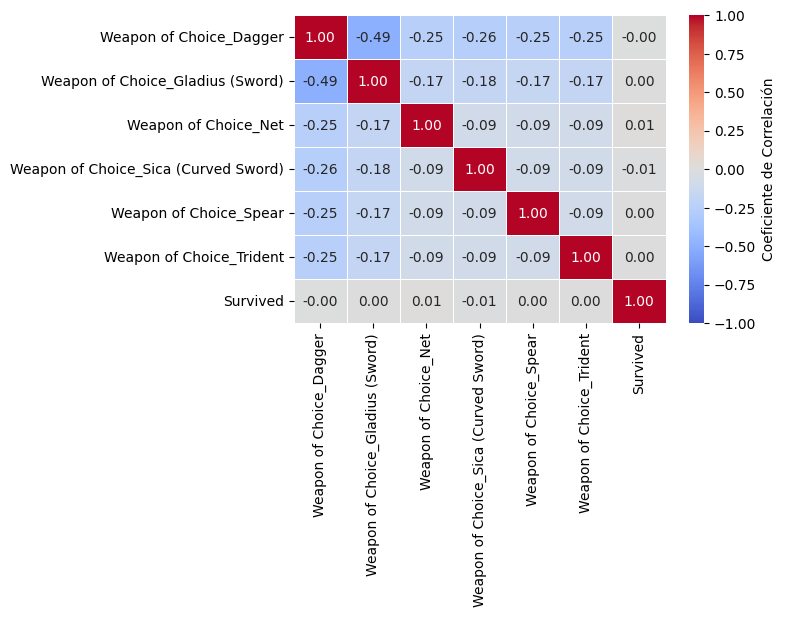

In [49]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion5,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [50]:
columnas_a_eliminar2 = ['Weapon of Choice_Dagger', 'Weapon of Choice_Gladius (Sword)', 'Weapon of Choice_Net', 'Weapon of Choice_Sica (Curved Sword)', 'Weapon of Choice_Spear', 'Weapon of Choice_Trident']

In [51]:
df4 = df3_encoded.drop(columnas_a_eliminar2, axis=1)
df4.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Patron Wealth,Equipment Quality,Public Favor,Injury History,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,32,97,195,85,11,4,Low,Basic,0.841842,High,...,15,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False
1,20,32,173,66,7,2,Low,Basic,0.651044,Low,...,9,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True
2,30,66,170,67,6,0,High,Superior,0.593816,Low,...,6,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True
3,28,43,189,104,6,2,High,Superior,0.540815,Low,...,8,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False
4,41,126,173,85,12,4,Medium,Standard,0.761651,High,...,16,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False


In [52]:
columnas_a_ver = [
    "Patron Wealth",
    "Equipment Quality",
    "Public Favor",
    "Injury History",
    "Mental Resilience",
    "Diet and Nutrition",
    "Tactical Knowledge",
    "Allegiance Network"
]

print("\nColumnas seleccionadas con sus registros:")
print(df4[columnas_a_ver])


Columnas seleccionadas con sus registros:
     Patron Wealth Equipment Quality  Public Favor Injury History  \
0              Low             Basic      0.841842           High   
1              Low             Basic      0.651044            Low   
2             High          Superior      0.593816            Low   
3             High          Superior      0.540815            Low   
4           Medium          Standard      0.761651           High   
...            ...               ...           ...            ...   
9971           Low             Basic      0.656655            Low   
9972          High          Superior      0.837236            Low   
9973        Medium          Standard      0.724112            Low   
9974          High          Superior      0.623464            Low   
9975           Low             Basic      0.566215            Low   

      Mental Resilience Diet and Nutrition Tactical Knowledge  \
0              1.005452               Poor       Intermediate  

In [53]:
df4['Patron Wealth'].nunique()

3

In [54]:
df4['Patron Wealth'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [55]:
# Codificación Ordinal
# Mapeos para 'Health Status', 'Training Intensity', 'Patron Wealth'
health_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
training_map = {'Low': 1, 'Medium': 2, 'High': 3}
patron_wealth_map = {'Low': 1, 'Medium': 2, 'High': 3} # Asumiendo este orden

df4['Health_Ordinal'] = df4['Health Status'].map(health_map)
df4['Training_Ordinal'] = df4['Training Intensity'].map(training_map)
df4['Patron_Wealth_Ordinal'] = df4['Patron Wealth'].map(patron_wealth_map)
df4.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Patron Wealth,Equipment Quality,Public Favor,Injury History,...,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Health_Ordinal,Training_Ordinal,Patron_Wealth_Ordinal
0,32,97,195,85,11,4,Low,Basic,0.841842,High,...,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,3,2,1
1,20,32,173,66,7,2,Low,Basic,0.651044,Low,...,Wealth,Criminal,High,Balanced,Low,Humble,True,4,3,1
2,30,66,170,67,6,0,High,Superior,0.593816,Low,...,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,4,1,3
3,28,43,189,104,6,2,High,Superior,0.540815,Low,...,Survival,Laborer,Low,Balanced,Low,Charismatic,False,4,1,3
4,41,126,173,85,12,4,Medium,Standard,0.761651,High,...,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,2,1,2


In [56]:
columnas_para_heatmap6 = [
    'Health_Ordinal',
    'Training_Ordinal',
    'Patron_Wealth_Ordinal',
    'Survived']

df6_seleccionado = df4[columnas_para_heatmap6]

matriz_correlacion6 = df6_seleccionado.corr()

<Axes: >

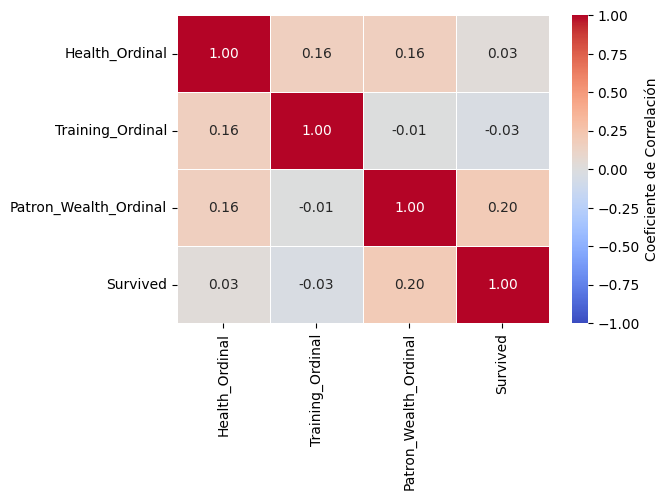

In [57]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion6,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [58]:
columnas_a_eliminar3 = ['Health_Ordinal', 'Training_Ordinal', 'Patron_Wealth_Ordinal']

In [59]:
df5 = df4.drop(columnas_a_eliminar3, axis=1)
df5.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Patron Wealth,Equipment Quality,Public Favor,Injury History,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,32,97,195,85,11,4,Low,Basic,0.841842,High,...,15,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False
1,20,32,173,66,7,2,Low,Basic,0.651044,Low,...,9,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True
2,30,66,170,67,6,0,High,Superior,0.593816,Low,...,6,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True
3,28,43,189,104,6,2,High,Superior,0.540815,Low,...,8,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False
4,41,126,173,85,12,4,Medium,Standard,0.761651,High,...,16,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False


In [60]:
df4_encoded = pd.get_dummies(df5, columns=['Patron Wealth'], drop_first=False, dtype=int)
df4_encoded

,Age,Birth Year,Height,Weight,Wins,Losses,Equipment Quality,Public Favor,Injury History,Mental Resilience,...,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Patron Wealth_Low,Patron Wealth_Medium
0,32,97,195,85,11,4,Basic,0.841842,High,1.005452,...,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0,1,0
1,20,32,173,66,7,2,Basic,0.651044,Low,5.930044,...,Wealth,Criminal,High,Balanced,Low,Humble,True,0,1,0
2,30,66,170,67,6,0,Superior,0.593816,Low,3.724350,...,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,1,0,0
3,28,43,189,104,6,2,Superior,0.540815,Low,3.101334,...,Survival,Laborer,Low,Balanced,Low,Charismatic,False,1,0,0
4,41,126,173,85,12,4,Standard,0.761651,High,4.335889,...,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,18,55,186,47,6,2,Basic,0.656655,Low,7.231887,...,Survival,Laborer,Medium,Aggressive,Medium,Intimidating,False,0,1,0
9972,28,45,178,59,10,2,Superior,0.837236,Low,7.314650,...,Freedom,Unemployed,Low,Defensive,High,Charismatic,True,1,0,0
9973,39,37,185,72,6,1,Standard,0.724112,Low,3.490999,...,Glory,Criminal,Medium,Aggressive,Low,Charismatic,False,0,0,1
9974,33,187,173,101,10,4,Superior,0.623464,Low,2.662364,...,Survival,Criminal,Medium,Balanced,Medium,Humble,True,1,0,0


In [61]:
columnas_para_heatmap7 = [
    'Patron Wealth_High',
    'Patron Wealth_Low',
    'Patron Wealth_Medium',
    'Survived']

In [62]:
df7_seleccionado = df4_encoded[columnas_para_heatmap7]

In [63]:
matriz_correlacion7 = df7_seleccionado.corr()

<Axes: >

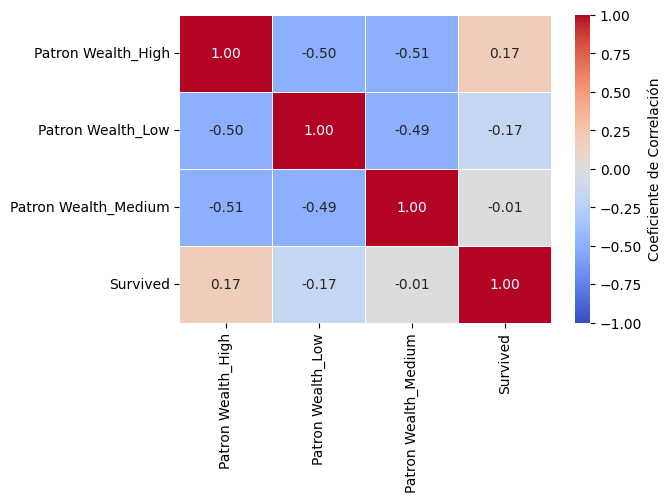

In [64]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion7,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [65]:
columnas_a_eliminar4 = ['Patron Wealth_Low', 'Patron Wealth_Medium']

In [66]:
df6 = df4_encoded.drop(columnas_a_eliminar4, axis=1)
df6.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Equipment Quality,Public Favor,Injury History,Mental Resilience,...,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High
0,32,97,195,85,11,4,Basic,0.841842,High,1.005452,...,Fearful,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0
1,20,32,173,66,7,2,Basic,0.651044,Low,5.930044,...,Fearful,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True,0
2,30,66,170,67,6,0,Superior,0.593816,Low,3.724350,...,Stoic,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,1
3,28,43,189,104,6,2,Superior,0.540815,Low,3.101334,...,Calculative,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False,1
4,41,126,173,85,12,4,Standard,0.761651,High,4.335889,...,Calculative,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,0


In [67]:
df6['Equipment Quality'].nunique()

3

In [68]:
df6['Equipment Quality'].unique()

array(['Basic', 'Superior', 'Standard'], dtype=object)

In [69]:
df5_encoded = pd.get_dummies(df6, columns=['Equipment Quality'], drop_first=False, dtype=int)
df5_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Injury History,Mental Resilience,Diet and Nutrition,...,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Basic,Equipment Quality_Standard,Equipment Quality_Superior
0,32,97,195,85,11,4,0.841842,High,1.005452,Poor,...,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0,1,0,0
1,20,32,173,66,7,2,0.651044,Low,5.930044,Poor,...,Criminal,High,Balanced,Low,Humble,True,0,1,0,0
2,30,66,170,67,6,0,0.593816,Low,3.724350,Excellent,...,Criminal,Low,Aggressive,Medium,Intimidating,True,1,0,0,1
3,28,43,189,104,6,2,0.540815,Low,3.101334,Excellent,...,Laborer,Low,Balanced,Low,Charismatic,False,1,0,0,1
4,41,126,173,85,12,4,0.761651,High,4.335889,Adequate,...,Unemployed,Low,Aggressive,High,Intimidating,False,0,0,1,0


In [70]:
columnas_para_heatmap8 = [
    'Equipment Quality_Basic',
    'Equipment Quality_Standard',
    'Equipment Quality_Superior',
    'Survived']

df8_seleccionado = df5_encoded[columnas_para_heatmap8]

matriz_correlacion8 = df8_seleccionado.corr()

<Axes: >

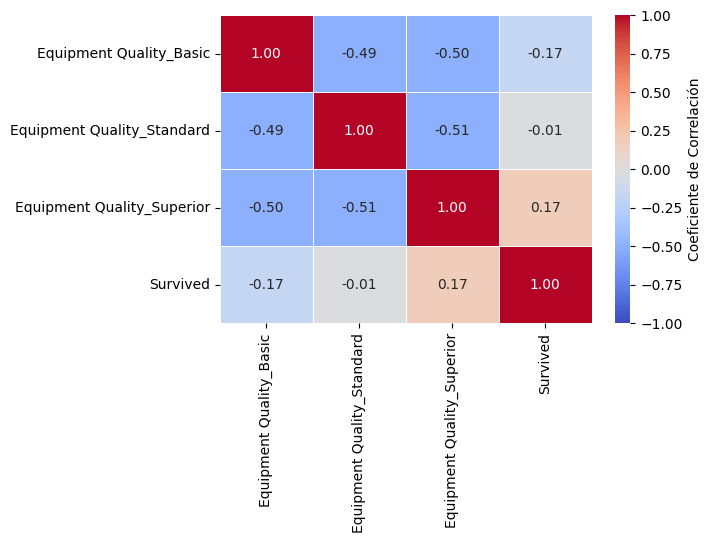

In [71]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion8,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [72]:
columnas_a_eliminar5 = ['Equipment Quality_Basic', 'Equipment Quality_Standard']

In [73]:
df7 = df5_encoded.drop(columnas_a_eliminar5, axis=1)
df7.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Injury History,Mental Resilience,Diet and Nutrition,...,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior
0,32,97,195,85,11,4,0.841842,High,1.005452,Poor,...,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0,0
1,20,32,173,66,7,2,0.651044,Low,5.930044,Poor,...,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True,0,0
2,30,66,170,67,6,0,0.593816,Low,3.724350,Excellent,...,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,1,1
3,28,43,189,104,6,2,0.540815,Low,3.101334,Excellent,...,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False,1,1
4,41,126,173,85,12,4,0.761651,High,4.335889,Adequate,...,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,0,0


In [74]:
df7['Injury History'].nunique()

2

In [75]:
df7['Injury History'].unique()

array(['High', 'Low'], dtype=object)

In [76]:
df6_encoded = pd.get_dummies(df7, columns=['Injury History'], drop_first=False, dtype=int)
df6_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Diet and Nutrition,Tactical Knowledge,...,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Injury History_High,Injury History_Low
0,32,97,195,85,11,4,0.841842,1.005452,Poor,Intermediate,...,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0,0,1,0
1,20,32,173,66,7,2,0.651044,5.930044,Poor,Advanced,...,Criminal,High,Balanced,Low,Humble,True,0,0,0,1
2,30,66,170,67,6,0,0.593816,3.724350,Excellent,Advanced,...,Criminal,Low,Aggressive,Medium,Intimidating,True,1,1,0,1
3,28,43,189,104,6,2,0.540815,3.101334,Excellent,Expert,...,Laborer,Low,Balanced,Low,Charismatic,False,1,1,0,1
4,41,126,173,85,12,4,0.761651,4.335889,Adequate,Intermediate,...,Unemployed,Low,Aggressive,High,Intimidating,False,0,0,1,0


In [77]:
columnas_para_heatmap9 = [
    'Injury History_High',
    'Injury History_Low',
    'Survived']

df9_seleccionado = df6_encoded[columnas_para_heatmap9]

matriz_correlacion9 = df9_seleccionado.corr()

<Axes: >

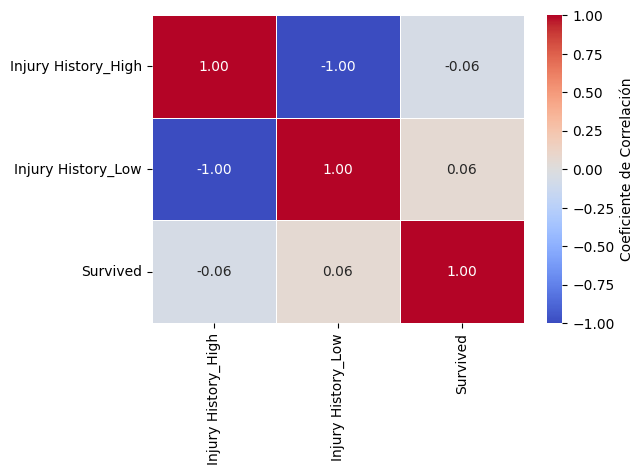

In [78]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion9,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [79]:
columnas_a_eliminar6 = ['Injury History_High', 'Injury History_Low']

In [80]:
df8 = df6_encoded.drop(columnas_a_eliminar6, axis=1)
df8.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Diet and Nutrition,Tactical Knowledge,...,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior
0,32,97,195,85,11,4,0.841842,1.005452,Poor,Intermediate,...,Good,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0,0
1,20,32,173,66,7,2,0.651044,5.930044,Poor,Advanced,...,Excellent,Wealth,Criminal,High,Balanced,Low,Humble,True,0,0
2,30,66,170,67,6,0,0.593816,3.724350,Excellent,Advanced,...,Excellent,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,1,1
3,28,43,189,104,6,2,0.540815,3.101334,Excellent,Expert,...,Excellent,Survival,Laborer,Low,Balanced,Low,Charismatic,False,1,1
4,41,126,173,85,12,4,0.761651,4.335889,Adequate,Intermediate,...,Fair,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,0,0


In [81]:
df8['Diet and Nutrition'].nunique()

3

In [82]:
df8['Diet and Nutrition'].unique()

array(['Poor', 'Excellent', 'Adequate'], dtype=object)

In [83]:
df7_encoded = pd.get_dummies(df8, columns=['Diet and Nutrition'], drop_first=False, dtype=int)
df7_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Tactical Knowledge,Allegiance Network,...,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Adequate,Diet and Nutrition_Excellent,Diet and Nutrition_Poor
0,32,97,195,85,11,4,0.841842,1.005452,Intermediate,Strong,...,Medium,Balanced,Medium,Flamboyant,False,0,0,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,Advanced,Moderate,...,High,Balanced,Low,Humble,True,0,0,0,0,1
2,30,66,170,67,6,0,0.593816,3.724350,Advanced,Strong,...,Low,Aggressive,Medium,Intimidating,True,1,1,0,1,0
3,28,43,189,104,6,2,0.540815,3.101334,Expert,Strong,...,Low,Balanced,Low,Charismatic,False,1,1,0,1,0
4,41,126,173,85,12,4,0.761651,4.335889,Intermediate,Strong,...,Low,Aggressive,High,Intimidating,False,0,0,1,0,0


In [84]:
columnas_para_heatmap10 = [
    'Diet and Nutrition_Adequate',
    'Diet and Nutrition_Excellent',
    'Diet and Nutrition_Poor',
    'Survived']

df10_seleccionado = df7_encoded[columnas_para_heatmap10]

matriz_correlacion10 = df10_seleccionado.corr()

<Axes: >

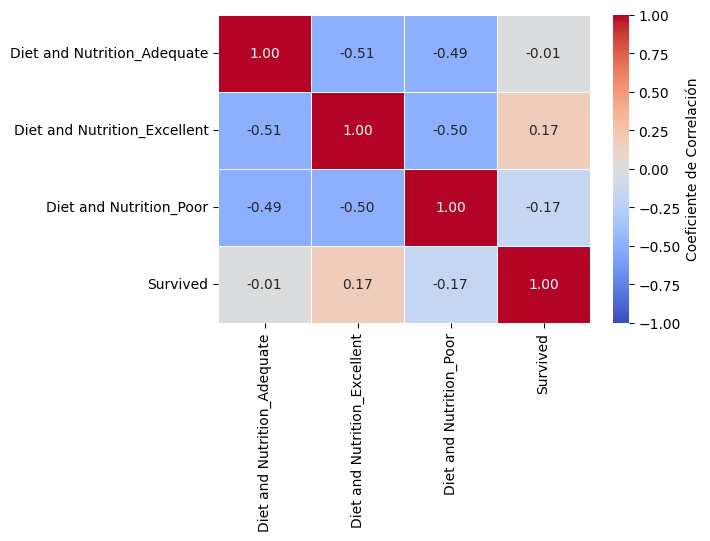

In [85]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion10,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [86]:
columnas_a_eliminar7 = ['Diet and Nutrition_Adequate', 'Diet and Nutrition_Poor']

In [87]:
df9 = df7_encoded.drop(columnas_a_eliminar7, axis=1)
df9.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Tactical Knowledge,Allegiance Network,...,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent
0,32,97,195,85,11,4,0.841842,1.005452,Intermediate,Strong,...,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0,0,0
1,20,32,173,66,7,2,0.651044,5.930044,Advanced,Moderate,...,Wealth,Criminal,High,Balanced,Low,Humble,True,0,0,0
2,30,66,170,67,6,0,0.593816,3.724350,Advanced,Strong,...,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,1,1,1
3,28,43,189,104,6,2,0.540815,3.101334,Expert,Strong,...,Survival,Laborer,Low,Balanced,Low,Charismatic,False,1,1,1
4,41,126,173,85,12,4,0.761651,4.335889,Intermediate,Strong,...,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,0,0,0


In [88]:
df9['Tactical Knowledge'].nunique()

4

In [89]:
df9['Tactical Knowledge'].unique()

array(['Intermediate', 'Advanced', 'Expert', 'Basic'], dtype=object)

In [90]:
df8_encoded = pd.get_dummies(df9, columns=['Tactical Knowledge'], drop_first=False, dtype=int)
df8_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Allegiance Network,Battle Experience,...,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Tactical Knowledge_Advanced,Tactical Knowledge_Basic,Tactical Knowledge_Expert,Tactical Knowledge_Intermediate
0,32,97,195,85,11,4,0.841842,1.005452,Strong,15,...,Medium,Flamboyant,False,0,0,0,0,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,Moderate,9,...,Low,Humble,True,0,0,0,1,0,0,0
2,30,66,170,67,6,0,0.593816,3.724350,Strong,6,...,Medium,Intimidating,True,1,1,1,1,0,0,0
3,28,43,189,104,6,2,0.540815,3.101334,Strong,8,...,Low,Charismatic,False,1,1,1,0,0,1,0
4,41,126,173,85,12,4,0.761651,4.335889,Strong,16,...,High,Intimidating,False,0,0,0,0,0,0,1


In [91]:
columnas_para_heatmap11 = [
    'Tactical Knowledge_Advanced',
    'Tactical Knowledge_Basic',
    'Tactical Knowledge_Expert',
    'Tactical Knowledge_Intermediate',
    'Survived']

df11_seleccionado = df8_encoded[columnas_para_heatmap11]

matriz_correlacion11 = df11_seleccionado.corr()

<Axes: >

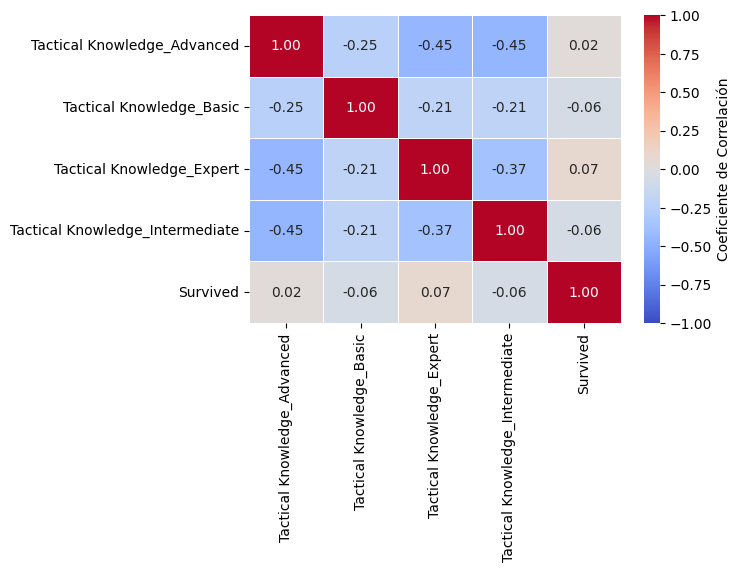

In [92]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion11,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [93]:
columnas_a_eliminar8 = ['Tactical Knowledge_Advanced', 'Tactical Knowledge_Basic', 'Tactical Knowledge_Expert', 'Tactical Knowledge_Intermediate']

In [94]:
df10 = df8_encoded.drop(columnas_a_eliminar8, axis=1)
df10.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Allegiance Network,Battle Experience,...,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent
0,32,97,195,85,11,4,0.841842,1.005452,Strong,15,...,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0,0,0
1,20,32,173,66,7,2,0.651044,5.930044,Moderate,9,...,Wealth,Criminal,High,Balanced,Low,Humble,True,0,0,0
2,30,66,170,67,6,0,0.593816,3.724350,Strong,6,...,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,1,1,1
3,28,43,189,104,6,2,0.540815,3.101334,Strong,8,...,Survival,Laborer,Low,Balanced,Low,Charismatic,False,1,1,1
4,41,126,173,85,12,4,0.761651,4.335889,Strong,16,...,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,0,0,0


In [95]:
df10['Allegiance Network'].nunique()

3

In [96]:
df10['Allegiance Network'].unique()

array(['Strong', 'Moderate', 'Weak'], dtype=object)

In [97]:
df9_encoded = pd.get_dummies(df10, columns=['Allegiance Network'], drop_first=False, dtype=int)
df9_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Psychological Profile,...,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Moderate,Allegiance Network_Strong,Allegiance Network_Weak
0,32,97,195,85,11,4,0.841842,1.005452,15,Fearful,...,Balanced,Medium,Flamboyant,False,0,0,0,0,1,0
1,20,32,173,66,7,2,0.651044,5.930044,9,Fearful,...,Balanced,Low,Humble,True,0,0,0,1,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Stoic,...,Aggressive,Medium,Intimidating,True,1,1,1,0,1,0
3,28,43,189,104,6,2,0.540815,3.101334,8,Calculative,...,Balanced,Low,Charismatic,False,1,1,1,0,1,0
4,41,126,173,85,12,4,0.761651,4.335889,16,Calculative,...,Aggressive,High,Intimidating,False,0,0,0,0,1,0


In [98]:
columnas_para_heatmap12 = [
    'Allegiance Network_Moderate',
    'Allegiance Network_Strong',
    'Allegiance Network_Weak',
    'Survived']

df12_seleccionado = df9_encoded[columnas_para_heatmap12]

matriz_correlacion12 = df12_seleccionado.corr()

<Axes: >

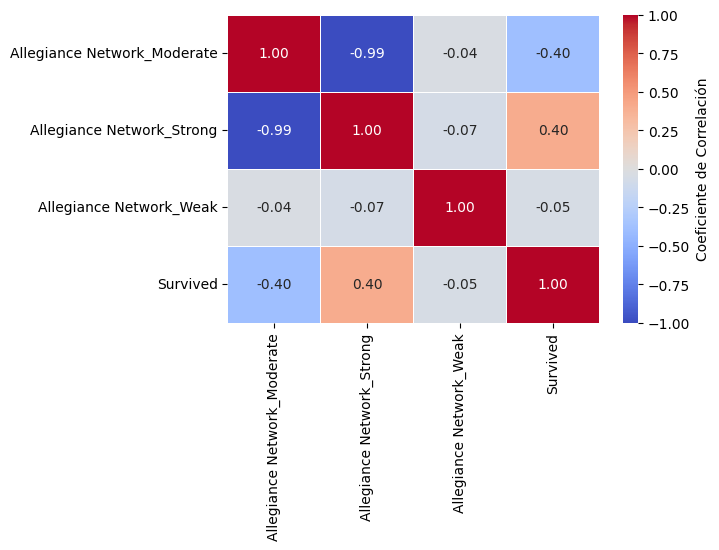

In [99]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion12,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [100]:
columnas_a_eliminar9 = ['Allegiance Network_Moderate', 'Allegiance Network_Weak']

In [101]:
df11 = df9_encoded.drop(columnas_a_eliminar9, axis=1)
df11.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Psychological Profile,...,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong
0,32,97,195,85,11,4,0.841842,1.005452,15,Fearful,...,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,Fearful,...,Criminal,High,Balanced,Low,Humble,True,0,0,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Stoic,...,Criminal,Low,Aggressive,Medium,Intimidating,True,1,1,1,1
3,28,43,189,104,6,2,0.540815,3.101334,8,Calculative,...,Laborer,Low,Balanced,Low,Charismatic,False,1,1,1,1
4,41,126,173,85,12,4,0.761651,4.335889,16,Calculative,...,Unemployed,Low,Aggressive,High,Intimidating,False,0,0,0,1


In [102]:
df11['Psychological Profile'].nunique()

4

In [103]:
df11['Psychological Profile'].unique()

array(['Fearful', 'Stoic', 'Calculative', 'Aggressive'], dtype=object)

In [104]:
df10_encoded = pd.get_dummies(df11, columns=['Psychological Profile'], drop_first=False, dtype=int)
df10_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Health Status,...,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong,Psychological Profile_Aggressive,Psychological Profile_Calculative,Psychological Profile_Fearful,Psychological Profile_Stoic
0,32,97,195,85,11,4,0.841842,1.005452,15,Good,...,Flamboyant,False,0,0,0,1,0,0,1,0
1,20,32,173,66,7,2,0.651044,5.930044,9,Excellent,...,Humble,True,0,0,0,0,0,0,1,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Excellent,...,Intimidating,True,1,1,1,1,0,0,0,1
3,28,43,189,104,6,2,0.540815,3.101334,8,Excellent,...,Charismatic,False,1,1,1,1,0,1,0,0
4,41,126,173,85,12,4,0.761651,4.335889,16,Fair,...,Intimidating,False,0,0,0,1,0,1,0,0


In [105]:
columnas_para_heatmap13 = [
    'Psychological Profile_Aggressive',
    'Psychological Profile_Calculative',
    'Psychological Profile_Fearful',
    'Psychological Profile_Stoic',
    'Survived']

df13_seleccionado = df10_encoded[columnas_para_heatmap13]

matriz_correlacion13 = df13_seleccionado.corr()

<Axes: >

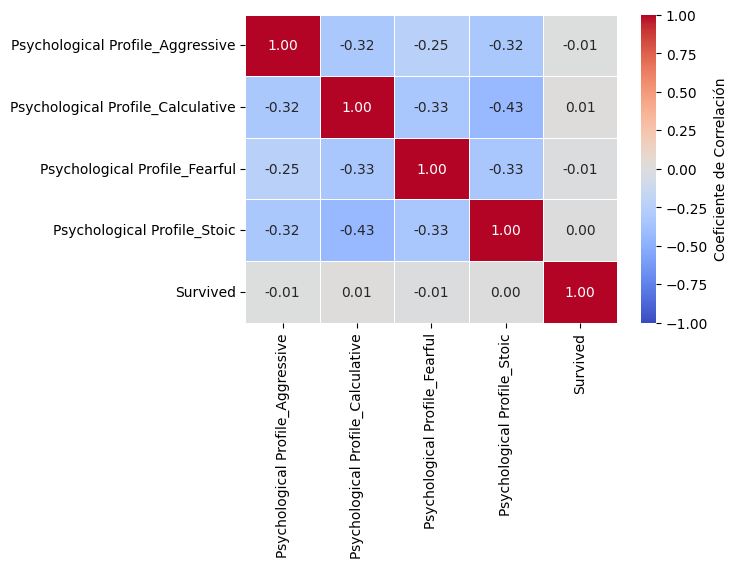

In [106]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion13,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [107]:
columnas_a_eliminar10 = ['Psychological Profile_Aggressive', 'Psychological Profile_Calculative', 'Psychological Profile_Fearful', 'Psychological Profile_Stoic']

In [108]:
df12 = df10_encoded.drop(columnas_a_eliminar10, axis=1)
df12.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Health Status,...,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong
0,32,97,195,85,11,4,0.841842,1.005452,15,Good,...,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,Excellent,...,Criminal,High,Balanced,Low,Humble,True,0,0,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Excellent,...,Criminal,Low,Aggressive,Medium,Intimidating,True,1,1,1,1
3,28,43,189,104,6,2,0.540815,3.101334,8,Excellent,...,Laborer,Low,Balanced,Low,Charismatic,False,1,1,1,1
4,41,126,173,85,12,4,0.761651,4.335889,16,Fair,...,Unemployed,Low,Aggressive,High,Intimidating,False,0,0,0,1


In [109]:
df12['Health Status'].nunique()

3

In [110]:
df12['Health Status'].unique()

array(['Good', 'Excellent', 'Fair'], dtype=object)

In [111]:
df11_encoded = pd.get_dummies(df12, columns=['Health Status'], drop_first=False, dtype=int)
df11_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Personal Motivation,...,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong,Health Status_Excellent,Health Status_Fair,Health Status_Good
0,32,97,195,85,11,4,0.841842,1.005452,15,Glory,...,Medium,Flamboyant,False,0,0,0,1,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,Wealth,...,Low,Humble,True,0,0,0,0,1,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Freedom,...,Medium,Intimidating,True,1,1,1,1,1,0,0
3,28,43,189,104,6,2,0.540815,3.101334,8,Survival,...,Low,Charismatic,False,1,1,1,1,1,0,0
4,41,126,173,85,12,4,0.761651,4.335889,16,Survival,...,High,Intimidating,False,0,0,0,1,0,1,0


In [112]:
columnas_para_heatmap14 = [
    'Health Status_Excellent',
    'Health Status_Fair',
    'Health Status_Good',
    'Survived']

df14_seleccionado = df11_encoded[columnas_para_heatmap14]

matriz_correlacion14 = df14_seleccionado.corr()

<Axes: >

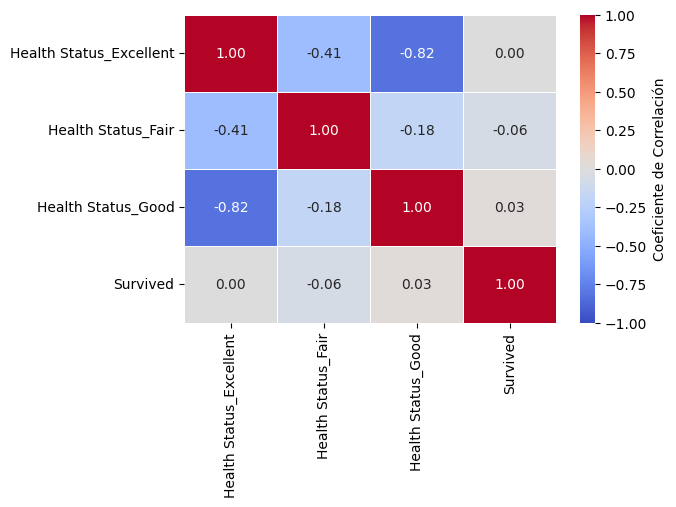

In [113]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion14,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [114]:
columnas_a_eliminar11 = ['Health Status_Excellent', 'Health Status_Fair', 'Health Status_Good']

In [115]:
df13 = df11_encoded.drop(columnas_a_eliminar11, axis=1)
df13.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong
0,32,97,195,85,11,4,0.841842,1.005452,15,Glory,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,Wealth,Criminal,High,Balanced,Low,Humble,True,0,0,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Freedom,Criminal,Low,Aggressive,Medium,Intimidating,True,1,1,1,1
3,28,43,189,104,6,2,0.540815,3.101334,8,Survival,Laborer,Low,Balanced,Low,Charismatic,False,1,1,1,1
4,41,126,173,85,12,4,0.761651,4.335889,16,Survival,Unemployed,Low,Aggressive,High,Intimidating,False,0,0,0,1


In [116]:
df13['Personal Motivation'].nunique()

5

In [117]:
df13['Personal Motivation'].unique()

array(['Glory', 'Wealth', 'Freedom', 'Survival', 'Vengeance'],
      dtype=object)

In [118]:
df12_encoded = pd.get_dummies(df13, columns=['Personal Motivation'], drop_first=False, dtype=int)
df12_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Previous Occupation,...,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong,Personal Motivation_Freedom,Personal Motivation_Glory,Personal Motivation_Survival,Personal Motivation_Vengeance,Personal Motivation_Wealth
0,32,97,195,85,11,4,0.841842,1.005452,15,Unemployed,...,False,0,0,0,1,0,1,0,0,0
1,20,32,173,66,7,2,0.651044,5.930044,9,Criminal,...,True,0,0,0,0,0,0,0,0,1
2,30,66,170,67,6,0,0.593816,3.724350,6,Criminal,...,True,1,1,1,1,1,0,0,0,0
3,28,43,189,104,6,2,0.540815,3.101334,8,Laborer,...,False,1,1,1,1,0,0,1,0,0
4,41,126,173,85,12,4,0.761651,4.335889,16,Unemployed,...,False,0,0,0,1,0,0,1,0,0


In [119]:
columnas_para_heatmap15 = [
    'Personal Motivation_Freedom',
    'Personal Motivation_Glory',
    'Personal Motivation_Survival',
    'Personal Motivation_Vengeance',
    'Personal Motivation_Wealth',
    'Survived']

df15_seleccionado = df12_encoded[columnas_para_heatmap15]

matriz_correlacion15 = df15_seleccionado.corr()

<Axes: >

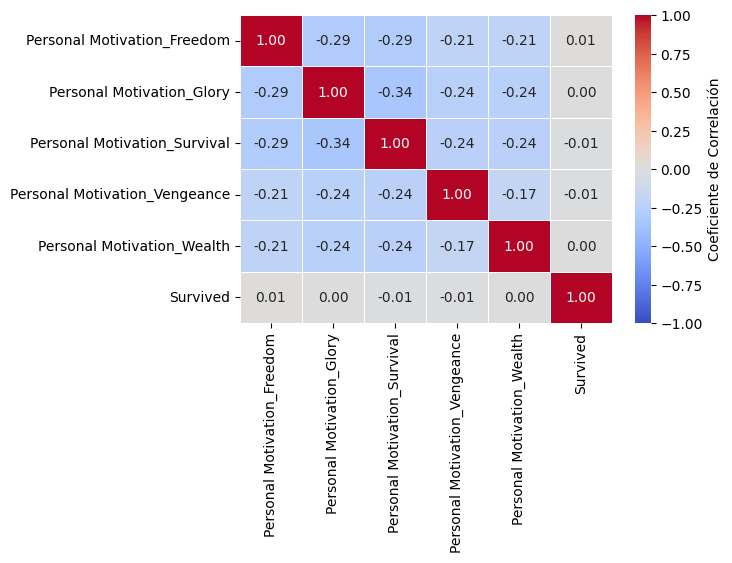

In [120]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion15,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [121]:
columnas_a_eliminar12 = ['Personal Motivation_Freedom', 'Personal Motivation_Glory', 'Personal Motivation_Survival', 'Personal Motivation_Vengeance', 'Personal Motivation_Wealth']

In [122]:
df14 = df12_encoded.drop(columnas_a_eliminar12, axis=1)
df14.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong
0,32,97,195,85,11,4,0.841842,1.005452,15,Unemployed,Medium,Balanced,Medium,Flamboyant,False,0,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,Criminal,High,Balanced,Low,Humble,True,0,0,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Criminal,Low,Aggressive,Medium,Intimidating,True,1,1,1,1
3,28,43,189,104,6,2,0.540815,3.101334,8,Laborer,Low,Balanced,Low,Charismatic,False,1,1,1,1
4,41,126,173,85,12,4,0.761651,4.335889,16,Unemployed,Low,Aggressive,High,Intimidating,False,0,0,0,1


In [123]:
df14['Previous Occupation'].nunique()

5

In [124]:
df14['Previous Occupation'].unique()

array(['Unemployed', 'Criminal', 'Laborer', 'Entertainer', 'Soldier'],
      dtype=object)

In [125]:
df13_encoded = pd.get_dummies(df14, columns=['Previous Occupation'], drop_first=False, dtype=int)
df13_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Training Intensity,...,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong,Previous Occupation_Criminal,Previous Occupation_Entertainer,Previous Occupation_Laborer,Previous Occupation_Soldier,Previous Occupation_Unemployed
0,32,97,195,85,11,4,0.841842,1.005452,15,Medium,...,False,0,0,0,1,0,0,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,High,...,True,0,0,0,0,1,0,0,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Low,...,True,1,1,1,1,1,0,0,0,0
3,28,43,189,104,6,2,0.540815,3.101334,8,Low,...,False,1,1,1,1,0,0,1,0,0
4,41,126,173,85,12,4,0.761651,4.335889,16,Low,...,False,0,0,0,1,0,0,0,0,1


In [126]:
columnas_para_heatmap16 = [
    'Previous Occupation_Criminal',
    'Previous Occupation_Entertainer',
    'Previous Occupation_Laborer',
    'Previous Occupation_Soldier',
    'Previous Occupation_Unemployed',
    'Survived']

df16_seleccionado = df13_encoded[columnas_para_heatmap16]

matriz_correlacion16 = df16_seleccionado.corr()

<Axes: >

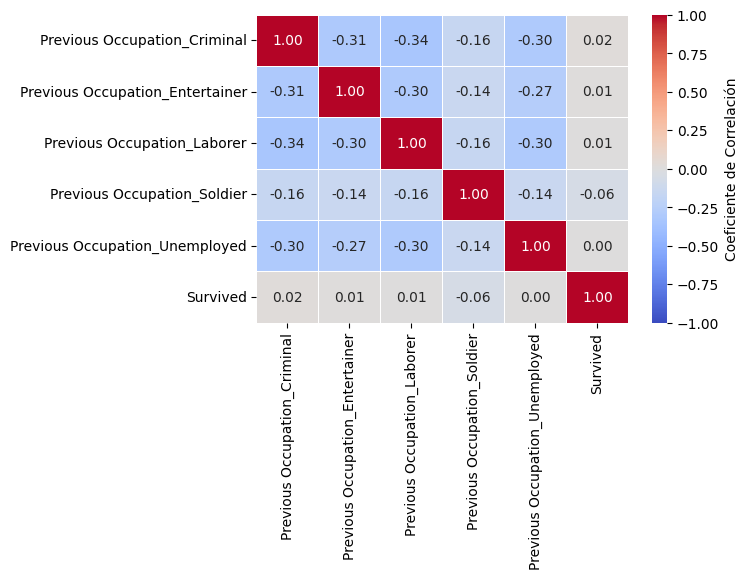

In [127]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion16,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [128]:
columnas_a_eliminar13 = ['Previous Occupation_Criminal', 'Previous Occupation_Entertainer', 'Previous Occupation_Laborer', 'Previous Occupation_Soldier', 'Previous Occupation_Unemployed']

In [129]:
df15 = df13_encoded.drop(columnas_a_eliminar13, axis=1)
df15.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong
0,32,97,195,85,11,4,0.841842,1.005452,15,Medium,Balanced,Medium,Flamboyant,False,0,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,High,Balanced,Low,Humble,True,0,0,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Low,Aggressive,Medium,Intimidating,True,1,1,1,1
3,28,43,189,104,6,2,0.540815,3.101334,8,Low,Balanced,Low,Charismatic,False,1,1,1,1
4,41,126,173,85,12,4,0.761651,4.335889,16,Low,Aggressive,High,Intimidating,False,0,0,0,1


In [130]:
df15['Training Intensity'].nunique()

3

In [131]:
df15['Training Intensity'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [132]:
df14_encoded = pd.get_dummies(df15, columns=['Training Intensity'], drop_first=False, dtype=int)
df14_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong,Training Intensity_High,Training Intensity_Low,Training Intensity_Medium
0,32,97,195,85,11,4,0.841842,1.005452,15,Balanced,Medium,Flamboyant,False,0,0,0,1,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,Balanced,Low,Humble,True,0,0,0,0,1,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Aggressive,Medium,Intimidating,True,1,1,1,1,0,1,0
3,28,43,189,104,6,2,0.540815,3.101334,8,Balanced,Low,Charismatic,False,1,1,1,1,0,1,0
4,41,126,173,85,12,4,0.761651,4.335889,16,Aggressive,High,Intimidating,False,0,0,0,1,0,1,0


In [133]:
columnas_para_heatmap17 = [
    'Training Intensity_High',
    'Training Intensity_Low',
    'Training Intensity_Medium',
    'Survived']

df17_seleccionado = df14_encoded[columnas_para_heatmap17]

matriz_correlacion17 = df17_seleccionado.corr()

<Axes: >

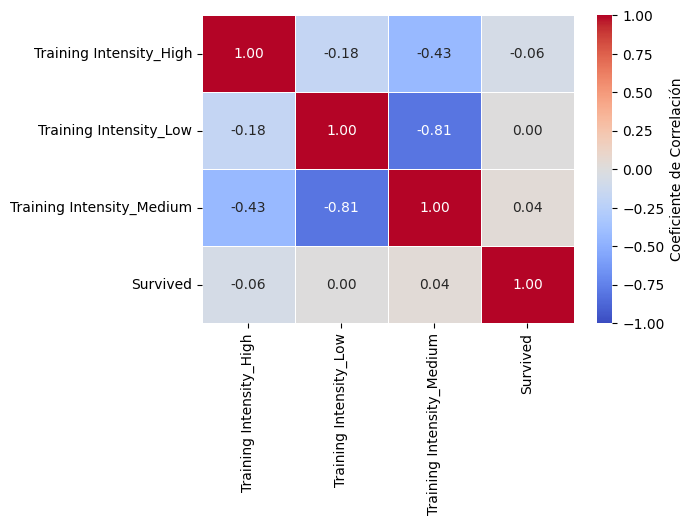

In [134]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion17,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [135]:
columnas_a_eliminar14 = ['Training Intensity_High', 'Training Intensity_Low', 'Training Intensity_Medium']

In [136]:
df16 = df14_encoded.drop(columnas_a_eliminar14, axis=1)
df16.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong
0,32,97,195,85,11,4,0.841842,1.005452,15,Balanced,Medium,Flamboyant,False,0,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,Balanced,Low,Humble,True,0,0,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Aggressive,Medium,Intimidating,True,1,1,1,1
3,28,43,189,104,6,2,0.540815,3.101334,8,Balanced,Low,Charismatic,False,1,1,1,1
4,41,126,173,85,12,4,0.761651,4.335889,16,Aggressive,High,Intimidating,False,0,0,0,1


In [137]:
df16['Battle Strategy'].nunique()

3

In [138]:
df16['Battle Strategy'].unique()

array(['Balanced', 'Aggressive', 'Defensive'], dtype=object)

In [139]:
df15_encoded = pd.get_dummies(df16, columns=['Battle Strategy'], drop_first=False, dtype=int)
df15_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong,Battle Strategy_Aggressive,Battle Strategy_Balanced,Battle Strategy_Defensive
0,32,97,195,85,11,4,0.841842,1.005452,15,Medium,Flamboyant,False,0,0,0,1,0,1,0
1,20,32,173,66,7,2,0.651044,5.930044,9,Low,Humble,True,0,0,0,0,0,1,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Medium,Intimidating,True,1,1,1,1,1,0,0
3,28,43,189,104,6,2,0.540815,3.101334,8,Low,Charismatic,False,1,1,1,1,0,1,0
4,41,126,173,85,12,4,0.761651,4.335889,16,High,Intimidating,False,0,0,0,1,1,0,0


In [140]:
columnas_para_heatmap18 = [
    'Battle Strategy_Aggressive',
    'Battle Strategy_Balanced',
    'Battle Strategy_Defensive',
    'Survived']

df18_seleccionado = df15_encoded[columnas_para_heatmap18]

matriz_correlacion18 = df18_seleccionado.corr()

<Axes: >

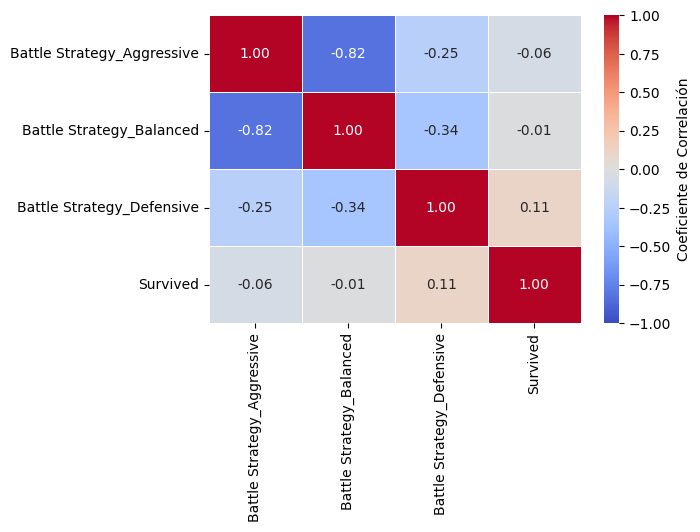

In [141]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion18,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [142]:
columnas_a_eliminar15 = ['Battle Strategy_Aggressive', 'Battle Strategy_Balanced', 'Battle Strategy_Defensive']

In [143]:
df17 = df15_encoded.drop(columnas_a_eliminar15, axis=1)
df17.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong
0,32,97,195,85,11,4,0.841842,1.005452,15,Medium,Flamboyant,False,0,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,Low,Humble,True,0,0,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Medium,Intimidating,True,1,1,1,1
3,28,43,189,104,6,2,0.540815,3.101334,8,Low,Charismatic,False,1,1,1,1
4,41,126,173,85,12,4,0.761651,4.335889,16,High,Intimidating,False,0,0,0,1


In [144]:
df17['Social Standing'].nunique()

3

In [145]:
df17['Social Standing'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [146]:
#Codificación Ordinal para Social Standing
social_standing_map = {'Low': 1, 'Medium': 2, 'High': 3} # Asume este orden
df17['Social_Standing_Ordinal'] = df17['Social Standing'].map(social_standing_map)

In [147]:
#Public Favor * Social Standing
# Y usa la versión ordinal de Social Standing
df17['PublicFavor_x_Standing'] = df17['Public Favor'] * df17['Social_Standing_Ordinal']
df17.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Social Standing,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong,Social_Standing_Ordinal,PublicFavor_x_Standing
0,32,97,195,85,11,4,0.841842,1.005452,15,Medium,Flamboyant,False,0,0,0,1,2,1.683683
1,20,32,173,66,7,2,0.651044,5.930044,9,Low,Humble,True,0,0,0,0,1,0.651044
2,30,66,170,67,6,0,0.593816,3.724350,6,Medium,Intimidating,True,1,1,1,1,2,1.187632
3,28,43,189,104,6,2,0.540815,3.101334,8,Low,Charismatic,False,1,1,1,1,1,0.540815
4,41,126,173,85,12,4,0.761651,4.335889,16,High,Intimidating,False,0,0,0,1,3,2.284954


In [148]:
columnas_para_heatmap19 = [
    'PublicFavor_x_Standing',
    'Social_Standing_Ordinal',
    'Survived']

df19_seleccionado = df17[columnas_para_heatmap19]

matriz_correlacion19 = df19_seleccionado.corr()

<Axes: >

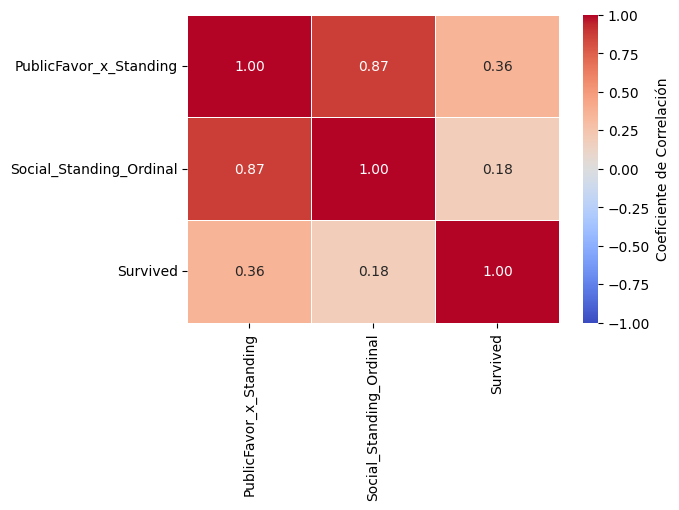

In [149]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion19,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [150]:
df16_encoded = pd.get_dummies(df17, columns=['Social Standing'], drop_first=False, dtype=int)
df16_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong,Social_Standing_Ordinal,PublicFavor_x_Standing,Social Standing_High,Social Standing_Low,Social Standing_Medium
0,32,97,195,85,11,4,0.841842,1.005452,15,Flamboyant,False,0,0,0,1,2,1.683683,0,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,Humble,True,0,0,0,0,1,0.651044,0,1,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Intimidating,True,1,1,1,1,2,1.187632,0,0,1
3,28,43,189,104,6,2,0.540815,3.101334,8,Charismatic,False,1,1,1,1,1,0.540815,0,1,0
4,41,126,173,85,12,4,0.761651,4.335889,16,Intimidating,False,0,0,0,1,3,2.284954,1,0,0


In [151]:
columnas_para_heatmap20 = [
    'Social Standing_High',
    'Social Standing_Low',
    'Social Standing_Medium',
    'Survived']

df20_seleccionado = df16_encoded[columnas_para_heatmap20]

matriz_correlacion20 = df20_seleccionado.corr()

<Axes: >

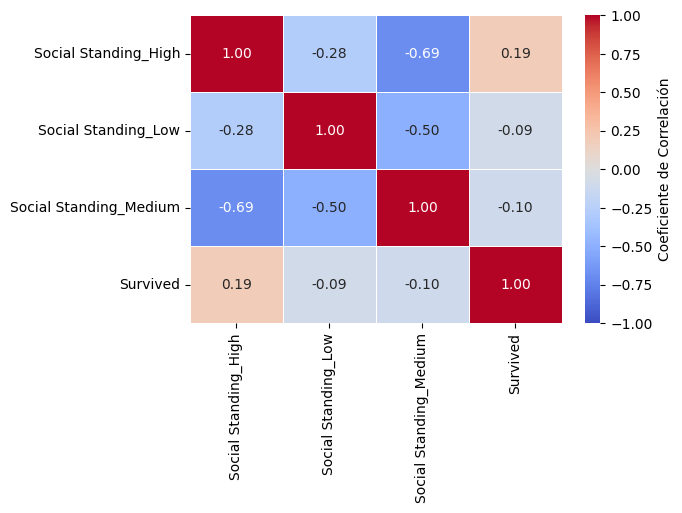

In [152]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion20,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [153]:
columnas_a_eliminar16 = ['Social Standing_Low', 'Social Standing_Medium']

In [154]:
df18 = df16_encoded.drop(columnas_a_eliminar16, axis=1)
df18.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Crowd Appeal Techniques,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong,Social_Standing_Ordinal,PublicFavor_x_Standing,Social Standing_High
0,32,97,195,85,11,4,0.841842,1.005452,15,Flamboyant,False,0,0,0,1,2,1.683683,0
1,20,32,173,66,7,2,0.651044,5.930044,9,Humble,True,0,0,0,0,1,0.651044,0
2,30,66,170,67,6,0,0.593816,3.724350,6,Intimidating,True,1,1,1,1,2,1.187632,0
3,28,43,189,104,6,2,0.540815,3.101334,8,Charismatic,False,1,1,1,1,1,0.540815,0
4,41,126,173,85,12,4,0.761651,4.335889,16,Intimidating,False,0,0,0,1,3,2.284954,1


In [155]:
df18['Crowd Appeal Techniques'].nunique()

4

In [156]:
df18['Crowd Appeal Techniques'].unique()

array(['Flamboyant', 'Humble', 'Intimidating', 'Charismatic'],
      dtype=object)

In [157]:
df17_encoded = pd.get_dummies(df18, columns=['Crowd Appeal Techniques'], drop_first=False, dtype=int)
df17_encoded.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Survived,...,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong,Social_Standing_Ordinal,PublicFavor_x_Standing,Social Standing_High,Crowd Appeal Techniques_Charismatic,Crowd Appeal Techniques_Flamboyant,Crowd Appeal Techniques_Humble,Crowd Appeal Techniques_Intimidating
0,32,97,195,85,11,4,0.841842,1.005452,15,False,...,0,0,1,2,1.683683,0,0,1,0,0
1,20,32,173,66,7,2,0.651044,5.930044,9,True,...,0,0,0,1,0.651044,0,0,0,1,0
2,30,66,170,67,6,0,0.593816,3.724350,6,True,...,1,1,1,2,1.187632,0,0,0,0,1
3,28,43,189,104,6,2,0.540815,3.101334,8,False,...,1,1,1,1,0.540815,0,1,0,0,0
4,41,126,173,85,12,4,0.761651,4.335889,16,False,...,0,0,1,3,2.284954,1,0,0,0,1


In [158]:
columnas_para_heatmap21 = [
    'Crowd Appeal Techniques_Charismatic',
    'Crowd Appeal Techniques_Flamboyant',
    'Crowd Appeal Techniques_Humble',
    'Crowd Appeal Techniques_Intimidating',
    'Survived']

df21_seleccionado = df17_encoded[columnas_para_heatmap21]

matriz_correlacion21 = df21_seleccionado.corr()

<Axes: >

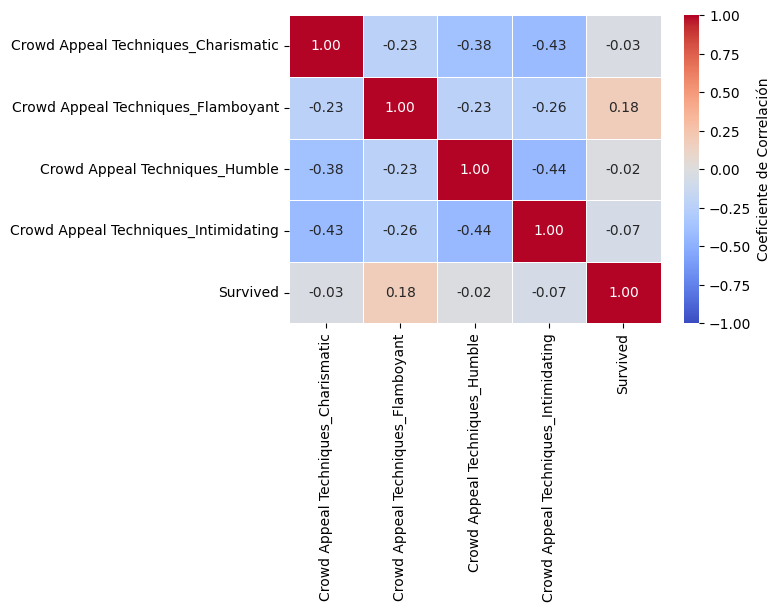

In [159]:
plt.figure(figsize=(6, 4)) # Ajusta el tamaño de la figura para una mejor lectura

sns.heatmap(
    matriz_correlacion21,
    annot=True,     # Muestra los valores de correlación en cada celda
    cmap="coolwarm",# Paleta de colores (coolwarm es ideal para correlaciones, va de azul a rojo pasando por blanco)
    fmt=".2f",      # Formatea los números a dos decimales
    linewidths=.5,  # Añade líneas entre las celdas para mayor claridad
    vmin=-1,        # Establece el valor mínimo para la escala de color (correlación perfecta negativa)
    vmax=1,         # Establece el valor máximo para la escala de color (correlación perfecta positiva)
    cbar_kws={'label': 'Coeficiente de Correlación'} # Etiqueta para la barra de color
)

In [160]:
columnas_a_eliminar17 = ['Crowd Appeal Techniques_Charismatic', 'Crowd Appeal Techniques_Humble', 'Crowd Appeal Techniques_Intimidating']

In [161]:
df19 = df17_encoded.drop(columnas_a_eliminar17, axis=1)
df19.head()

,Age,Birth Year,Height,Weight,Wins,Losses,Public Favor,Mental Resilience,Battle Experience,Survived,Patron Wealth_High,Equipment Quality_Superior,Diet and Nutrition_Excellent,Allegiance Network_Strong,Social_Standing_Ordinal,PublicFavor_x_Standing,Social Standing_High,Crowd Appeal Techniques_Flamboyant
0,32,97,195,85,11,4,0.841842,1.005452,15,False,0,0,0,1,2,1.683683,0,1
1,20,32,173,66,7,2,0.651044,5.930044,9,True,0,0,0,0,1,0.651044,0,0
2,30,66,170,67,6,0,0.593816,3.724350,6,True,1,1,1,1,2,1.187632,0,0
3,28,43,189,104,6,2,0.540815,3.101334,8,False,1,1,1,1,1,0.540815,0,0
4,41,126,173,85,12,4,0.761651,4.335889,16,False,0,0,0,1,3,2.284954,1,0


<Axes: >

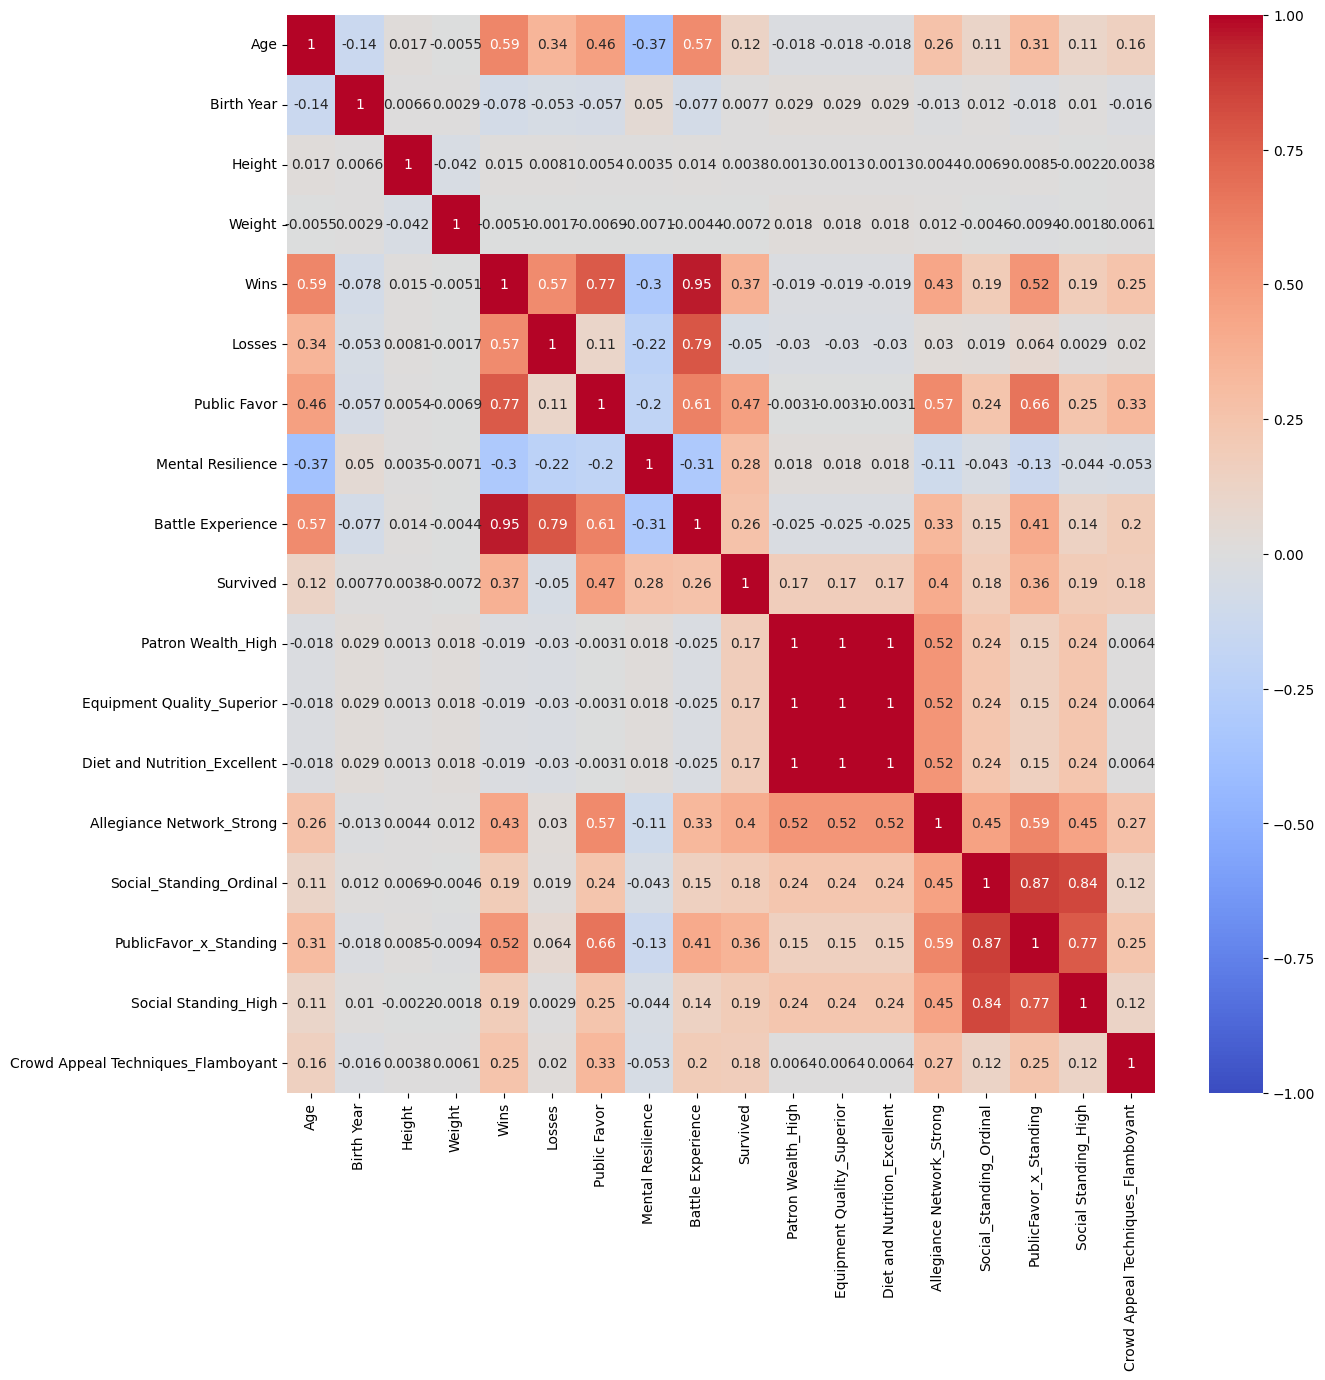

In [162]:
plt.figure(figsize=(14, 14))
sns.heatmap(df19.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1)

In [163]:
columnas_a_eliminar18 = ['Age', 'PublicFavor_x_Standing', 'Social_Standing_Ordinal', 'Birth Year', 'Height', 'Weight', 'Losses', 'Mental Resilience', 'Battle Experience', 'Patron Wealth_High', 'Equipment Quality_Superior', 'Diet and Nutrition_Excellent', 'Social Standing_High', 'Crowd Appeal Techniques_Flamboyant']

In [164]:
df20 = df19.drop(columnas_a_eliminar18, axis=1)
df20.head()

,Wins,Public Favor,Survived,Allegiance Network_Strong
0,11,0.841842,False,1
1,7,0.651044,True,0
2,6,0.593816,True,1
3,6,0.540815,False,1
4,12,0.761651,False,1


<Axes: >

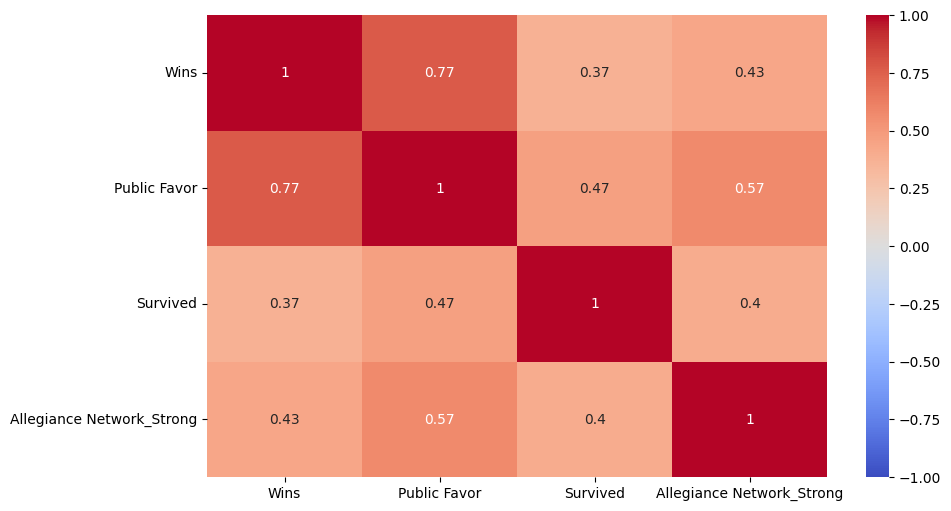

In [165]:
plt.figure(figsize=(10, 6))
sns.heatmap(df20.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1)

<Figure size 100x100 with 0 Axes>

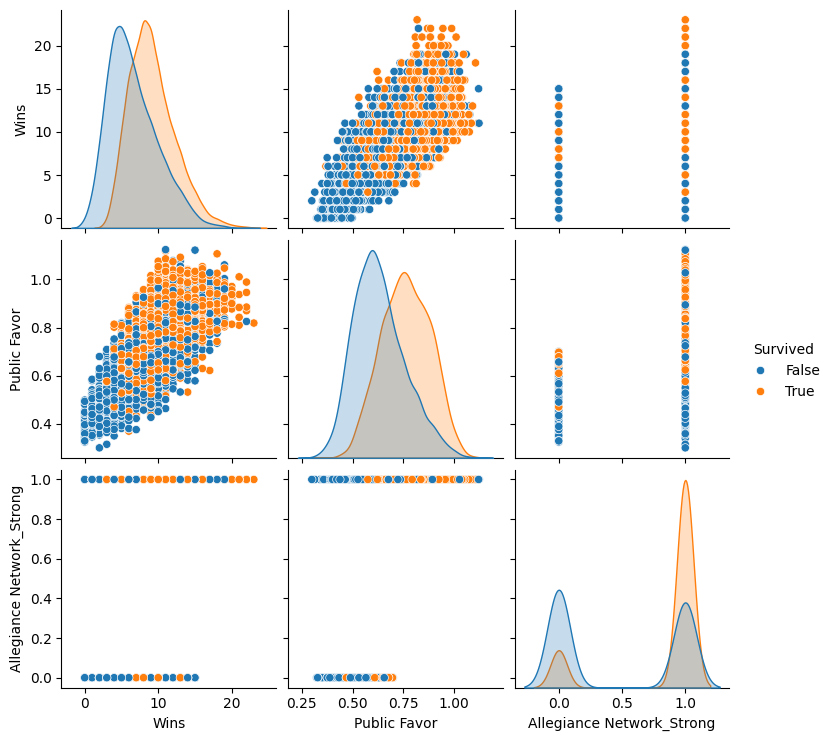

In [173]:
plt.figure(figsize=(1, 1))
sns.pairplot(df20, hue='Survived')

In [167]:
df20.to_csv('../data/raw/gladiador_data_procesado.csv', index=False)